In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
real_data=pd.read_csv('Mechanical_properties_of_low_alloy_steels.csv')
data=real_data.copy()
data.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [3]:
data.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [4]:
data.drop([' 0.2% Proof Stress (MPa)',' Elongation (%)', ' Reduction in Area (%)'],axis=1,inplace=True)

In [5]:
data.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),Tensile Strength (MPa)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,490
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,454
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,465
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,495
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,489


In [6]:
data.isnull().sum()

Alloy code                 0
 C                         0
 Si                        0
 Mn                        0
 P                         0
 S                         0
 Ni                        0
 Cr                        0
 Mo                        0
 Cu                        0
V                          0
 Al                        0
 N                         0
Ceq                        0
Nb + Ta                    0
 Temperature (°C)          0
 Tensile Strength (MPa)    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Alloy code               915 non-null    object 
 1    C                       915 non-null    float64
 2    Si                      915 non-null    float64
 3    Mn                      915 non-null    float64
 4    P                       915 non-null    float64
 5    S                       915 non-null    float64
 6    Ni                      915 non-null    float64
 7    Cr                      915 non-null    float64
 8    Mo                      915 non-null    float64
 9    Cu                      915 non-null    float64
 10  V                        915 non-null    float64
 11   Al                      915 non-null    float64
 12   N                       915 non-null    float64
 13  Ceq                      915 non-null    float64
 14  Nb + Ta                  9

In [8]:
data.describe()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),Tensile Strength (MPa)
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,0.174929,0.310918,0.812962,0.014543,0.010602,0.143016,0.427861,0.442870,0.079148,0.060190,0.012435,0.007652,0.093989,0.000041,351.601093,496.248087
std,0.059674,0.086871,0.342775,0.005244,0.004024,0.172746,0.457568,0.394383,0.058481,0.096403,0.013067,0.002321,0.172533,0.000261,189.714773,239.710650
min,0.090000,0.180000,0.420000,0.006000,0.003000,0.000000,0.000000,0.005000,0.000000,0.000000,0.002000,0.002500,0.000000,0.000000,27.000000,162.000000
25%,0.130000,0.240000,0.500000,0.010000,0.008000,0.023000,0.040000,0.050000,0.040000,0.000000,0.004000,0.006200,0.000000,0.000000,200.000000,413.000000
50%,0.160000,0.300000,0.680000,0.014000,0.010000,0.050000,0.110000,0.500000,0.070000,0.000000,0.006000,0.007600,0.000000,0.000000,400.000000,479.000000
75%,0.200000,0.370000,1.210000,0.018000,0.012000,0.210000,1.000000,0.560000,0.110000,0.070000,0.016000,0.009000,0.000000,0.000000,500.000000,575.000000
max,0.340000,0.520000,1.480000,0.030000,0.022000,0.600000,1.310000,1.350000,0.250000,0.300000,0.050000,0.015000,0.437000,0.001700,650.000000,6661.000000


In [9]:
tensile=data[' Tensile Strength (MPa)']
temp=data[' Temperature (°C)']
data.drop([' Tensile Strength (MPa)',' Temperature (°C)'],axis=1,inplace=True)

In [10]:
data['Tensile_Strength']=tensile
data['Temperature']=temp
data.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Tensile_Strength,Temperature
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,490,27
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,454,100
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,465,200
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,495,300
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,489,400


In [11]:
data['Alloy code'].unique()

array(['MBB', 'MBC', 'MBD', 'MBE', 'MBF', 'MBG', 'MBH', 'MBJ', 'MBL',
       'MBM', 'MBN', 'CAA', 'CAB', 'CAC', 'CAG', 'CAH', 'CAJ', 'CAL',
       'CAM', 'CAN', 'LAA', 'LAB', 'LAC', 'LAD', 'LAE', 'LAF', 'LAG',
       'LAH', 'LAJ', 'LAL', 'LAM', 'LAN', 'CaC', 'CaD', 'CaE', 'CaF',
       'CaG', 'CaH', 'CaM', 'CaN', 'VaA', 'VaB', 'VaC', 'VaD', 'VaE',
       'VaG', 'VaH', 'Vaj', 'VaR', 'LaA', 'LaB', 'LaD', 'LaE', 'LaF',
       'MFA', 'MFB', 'MFD', 'MFE', 'MFF', 'MFG', 'MFH', 'MFL', 'MFM',
       'VbA', 'VbB', 'VbD', 'VbF', 'VbG', 'VbH', 'VbJ', 'VbM', 'VbN',
       'CbA', 'CbB', 'CbC', 'CbD', 'CbE', 'CbF', 'CbG', 'CbH', 'CbJ',
       'CbL', 'CbM', 'CbN', 'CbR', 'CbS', 'CbT', 'CbU', 'CbV', 'CbW',
       'CbX', 'CbY', 'CbZ', 'CCA', 'CCB'], dtype=object)

In [12]:
data.drop(['Alloy code','Ceq'],axis=1,inplace=True)

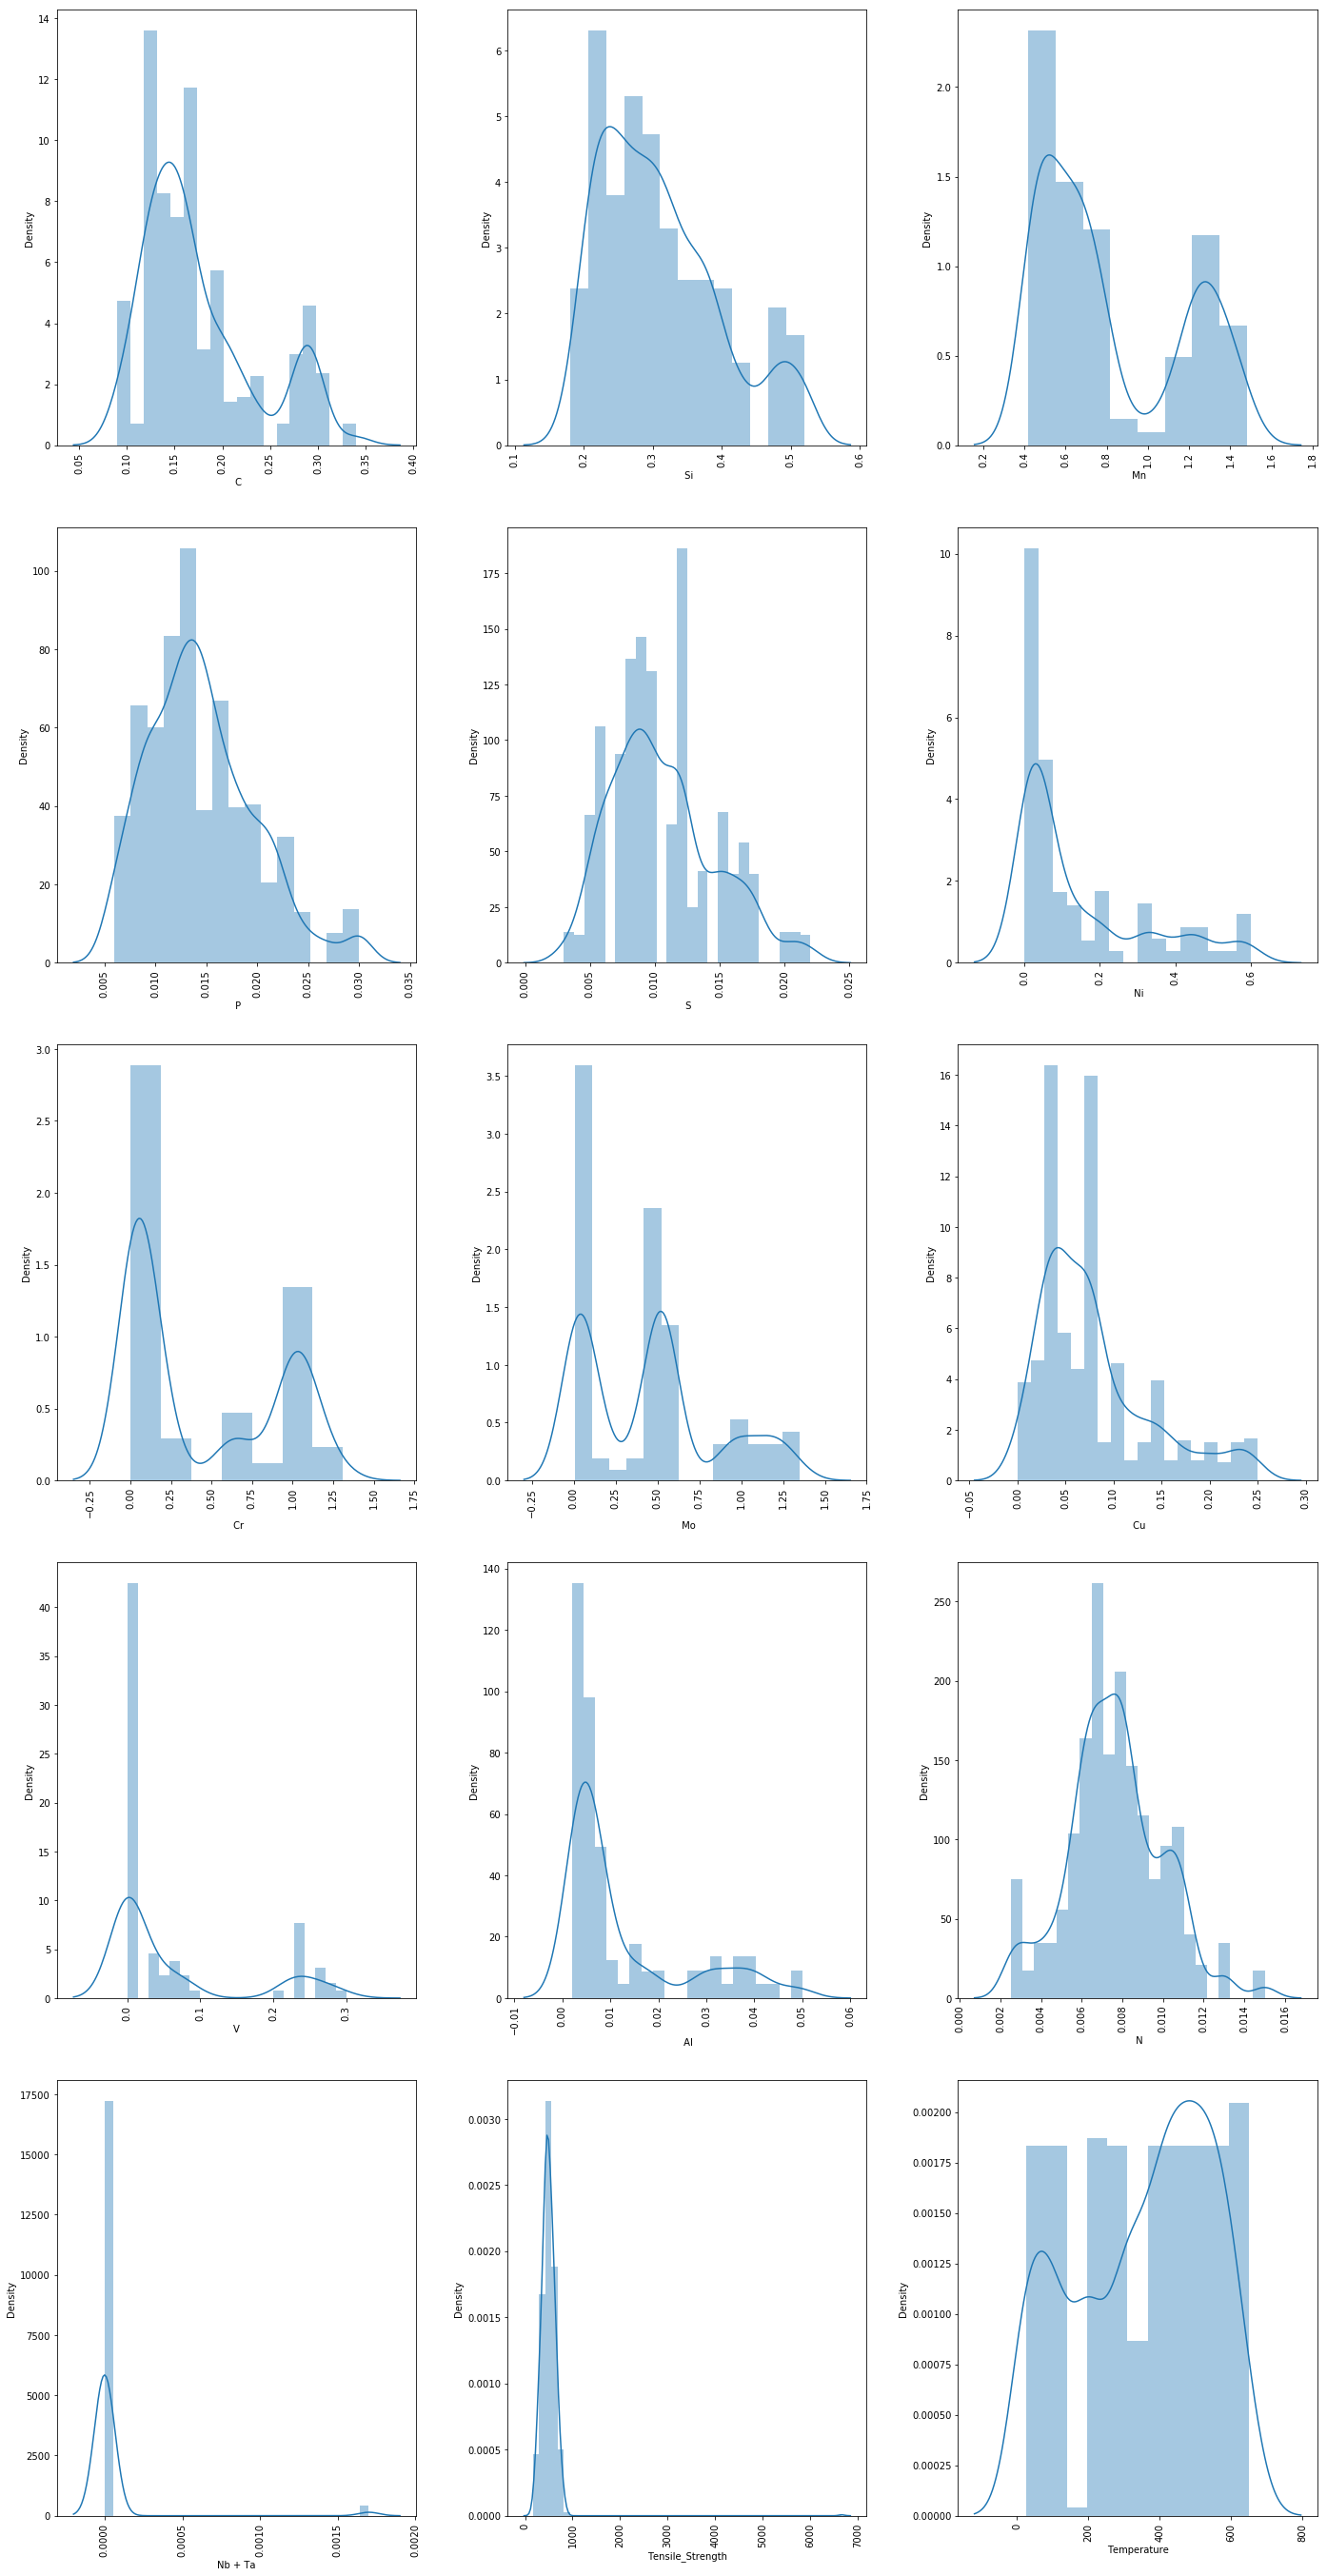

In [13]:
c=1
plt.figure(figsize=(20,45))

for i in data.columns:
    plt.subplot(6,3,c)
    sns.distplot(data[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

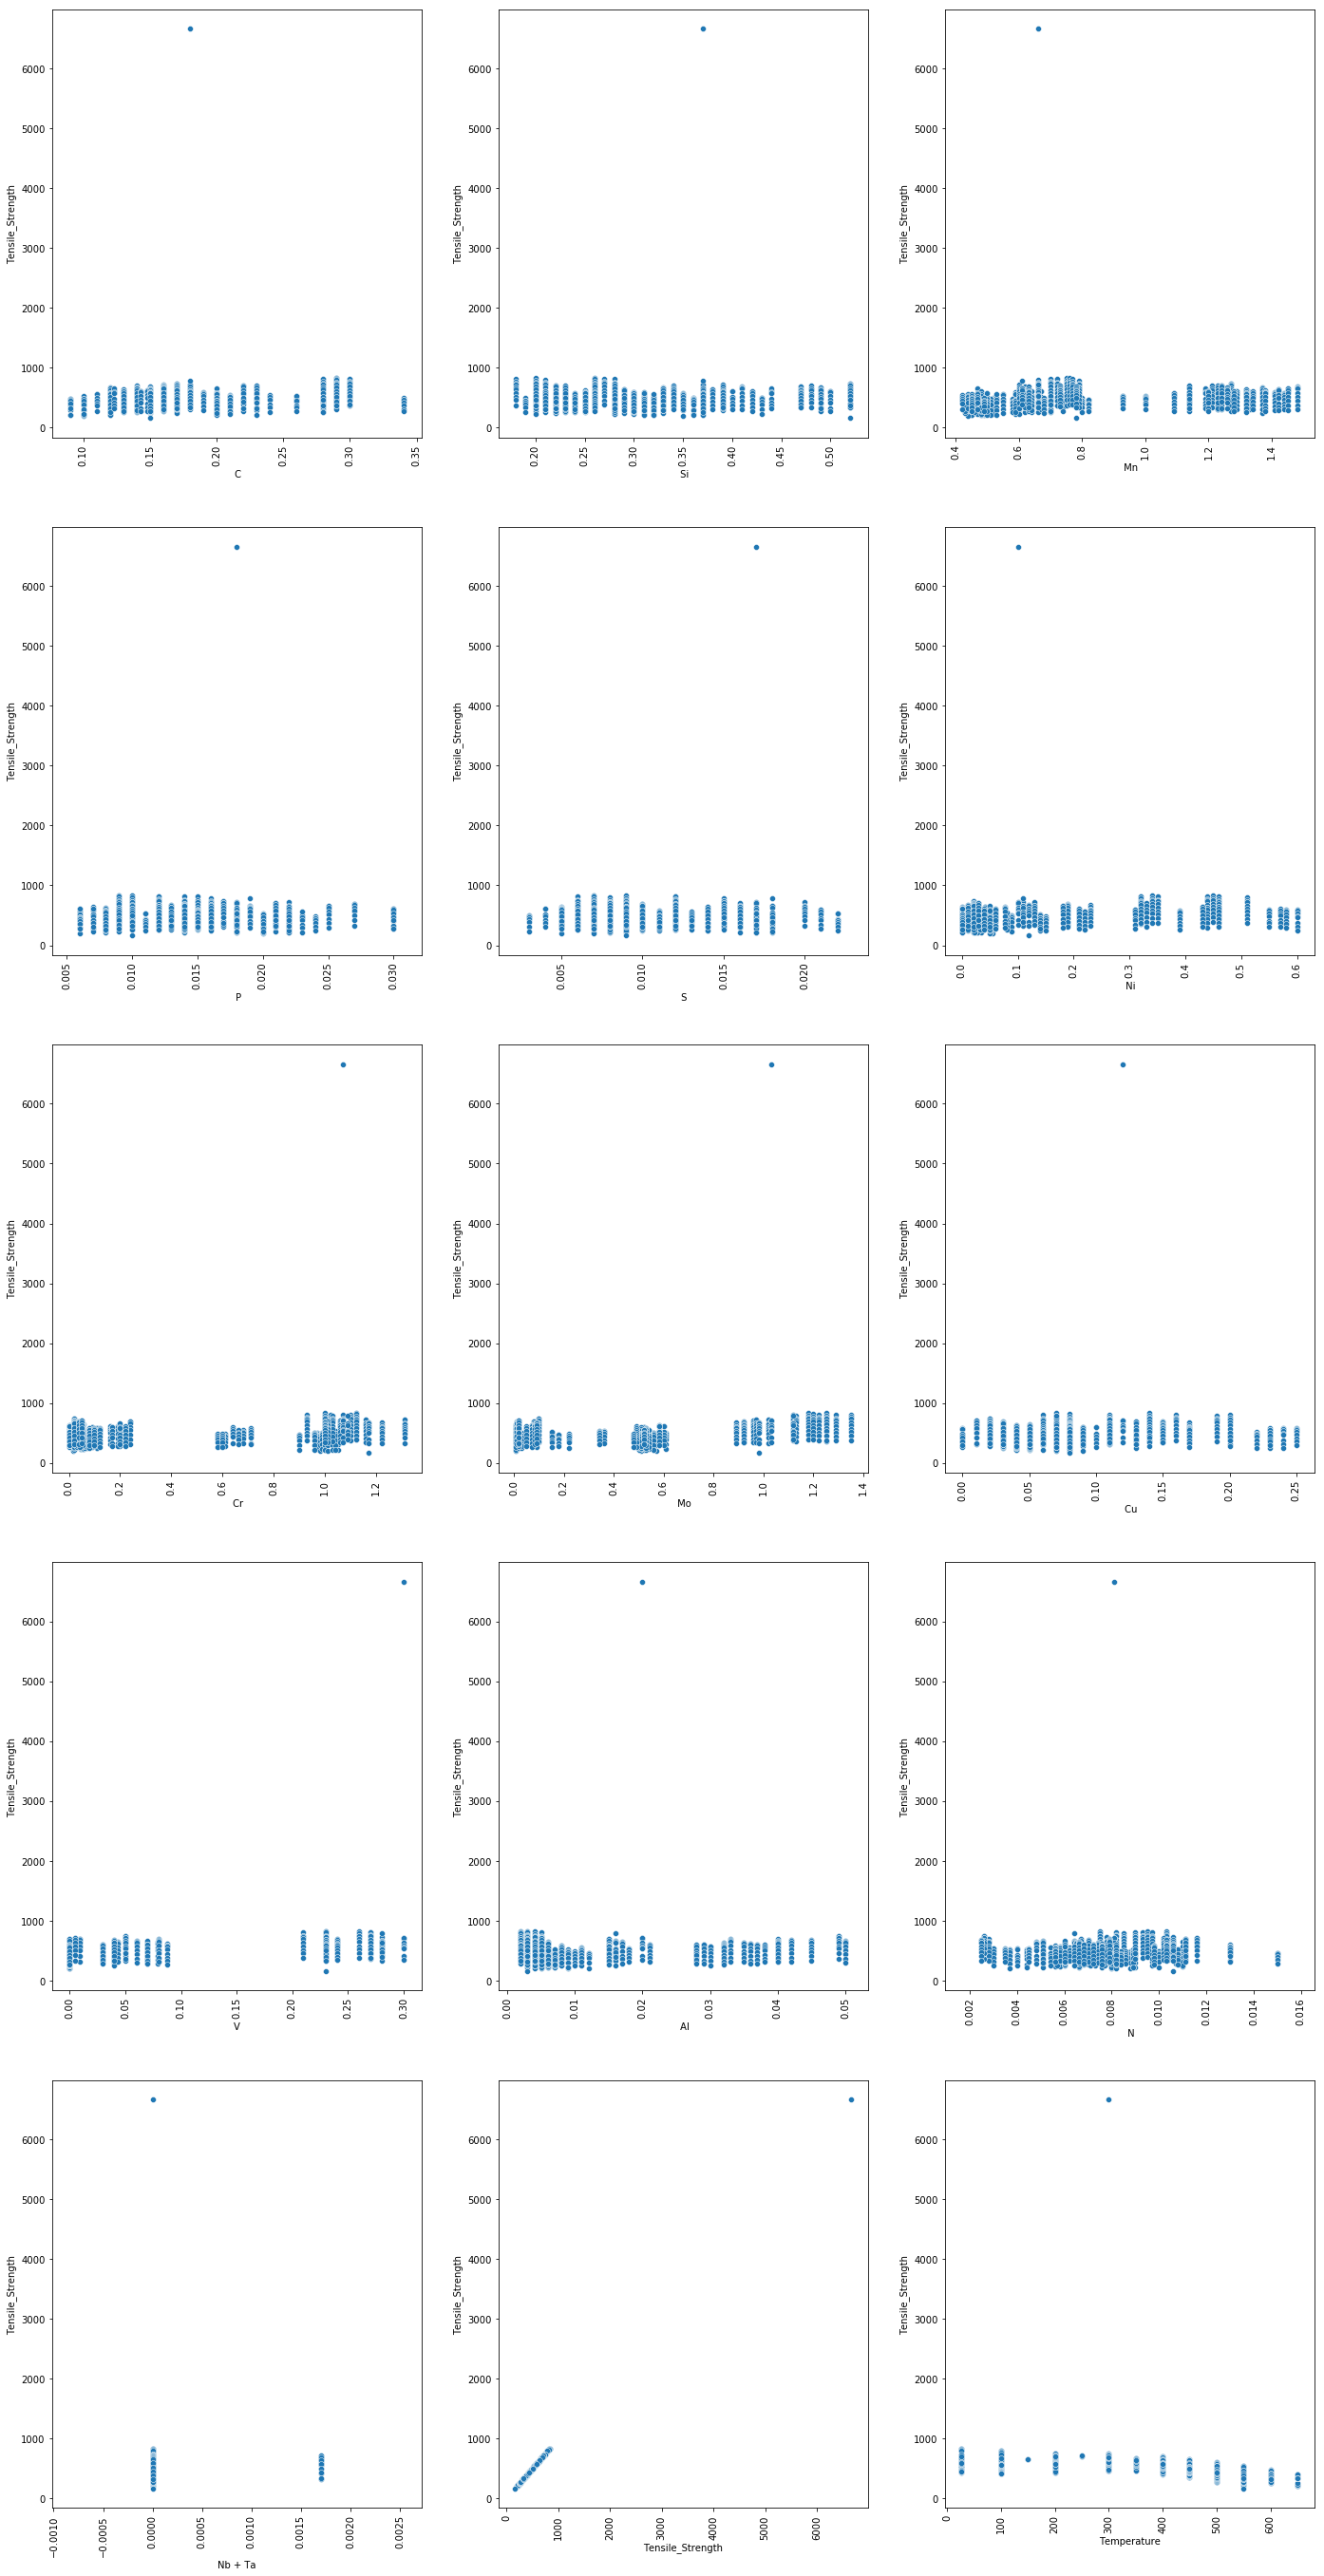

In [14]:
c=1
plt.figure(figsize=(20,45))

for i in data.columns:
    plt.subplot(6,3,c)
    sns.scatterplot(x=data[i],y=data.Tensile_Strength)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c+=1
plt.show()

In [15]:
data.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Nb + Ta,Tensile_Strength,Temperature
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,490,27
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,454,100
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,465,200
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,495,300
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,489,400


In [16]:
x=data.drop('Tensile_Strength',axis=1)
y=data.Tensile_Strength

In [17]:
print(x.shape, y.shape)

(915, 14) (915,)


In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=1)
print(f'x_train:{x_train.shape}\ty_train:{y_train.shape}\nx_test:{x_test.shape}\ty_test:{y_test.shape}')

x_train:(777, 14)	y_train:(777,)
x_test:(138, 14)	y_test:(138,)


In [19]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x_train_scaled=sc_x.fit_transform(x_train)
y_train=np.array(y_train).reshape(len(y_train),1)
y_train_scaled=sc_y.fit_transform(y_train)

x_test_scaled=sc_x.fit_transform(x_test)

In [21]:
print(f'x_train_scaled:{x_train_scaled.shape}\ty_train_scaled:{y_train_scaled.shape}\nx_test_scaled:{x_test_scaled.shape}')

x_train_scaled:(777, 14)	y_train_scaled:(777, 1)
x_test_scaled:(138, 14)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

lr=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
knr=KNeighborsRegressor()

In [23]:
scaled=[lr,svr,knr]
    
def predict(models):
    global best_model
    global max_r2
    best_model=None
    max_r2=0
    for reg in models:
        if reg in scaled:
            model=reg.fit(x_train_scaled,y_train_scaled)
            print(f'Training Score of model {model} is {model.score(x_train_scaled,y_train_scaled)}')
            y_pred=sc_y.inverse_transform(model.predict(x_test_scaled))
        else:
            model=reg.fit(x_train,y_train)
            print(f'Training Score of model {model} is {model.score(x_train,y_train)}')
            y_pred=model.predict(x_test)
        
        current_r2_score=r2_score(y_test,y_pred)
        print(f'R2-Score:{current_r2_score}')
        print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')
        print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}')
        
        if current_r2_score>max_r2:
            max_r2=current_r2_score
            best_model=model
        
        print('------------------------------------------------------------------------------------------------')

In [24]:
predict([lr,svr,dtr,rfr,abr,gbr,knr])

Training Score of model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is 0.21519482665884904
R2-Score:0.6645482303230281
Mean Squared Error: 5916.460675470396
Mean Absolute Error: 63.23894326498015
------------------------------------------------------------------------------------------------
Training Score of model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is 0.26867051021908195
R2-Score:0.9175231781817909
Mean Squared Error: 1454.6677556511684
Mean Absolute Error: 30.625004128873147
------------------------------------------------------------------------------------------------
Training Score of model DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_wei

In [46]:
pred=np.array([[0.12,0.25,0.48,0.008,0.012,0.04,0.64,0.51,0.04,0,0.006,0.013,0,200]])

In [48]:
best_model.predict(pred)

array([541.2])

In [67]:
import joblib
joblib.dump(best_model,'final_model.obj')

['final_model.obj']

# TODO:

### Try gridsearch